<a href="https://colab.research.google.com/github/Kashishkewat/machine-learning/blob/main/polynomial_features_in_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded=files.upload()

Saving ushape.csv to ushape.csv


In [5]:
df=pd.read_csv('ushape.csv')

In [6]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [7]:
X=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

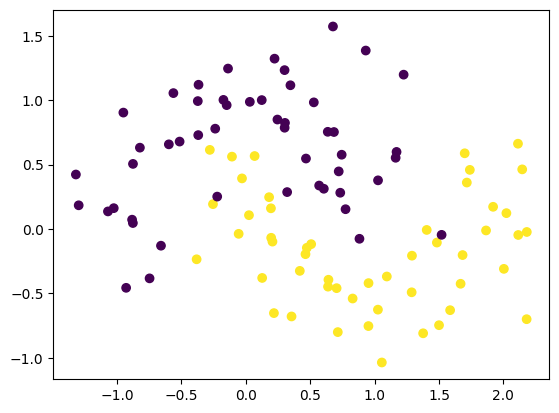

In [8]:
plt.scatter(X[:,0],X[:,1],c=y)

In [9]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [10]:
clf.fit(X,y)

LogisticRegression()

<Axes: >

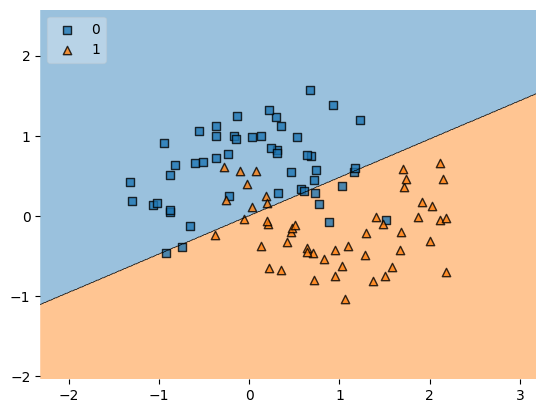

In [13]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=clf,legend=2)

In [14]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

np.float64(0.8300000000000001)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
ploy=PolynomialFeatures(degree=3,include_bias=False)
X_trf=ploy.fit_transform(X)

In [18]:
clf1=LogisticRegression()
np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))

np.float64(0.9)

In [24]:
def plot_decision_boundary(X,y,degree=1):
  poly=PolynomialFeatures(degree=degree)
  X_trf=poly.fit_transform(X)
  clf=LogisticRegression()
  clf.fit(X_trf,y)

  accuracy=np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))

  a=np.arange(start=X[:,0].min()-1,stop=X[:,0].max()+1,step=0.01)
  b=np.arange(start=X[:,1].min()-1,stop=X[:,1].max()+1,step=0.01)

  XX,YY=np.meshgrid(a,b)
  input_array=np.array([XX.ravel(),YY.ravel()]).T
  labels=clf.predict(poly.transform(input_array))
  plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
  plt.scatter(X[:,0],X[:,1],c=y)
  plt.title('Degree = {},accuracy is {}'.format(degree, np.round(accuracy,4)))

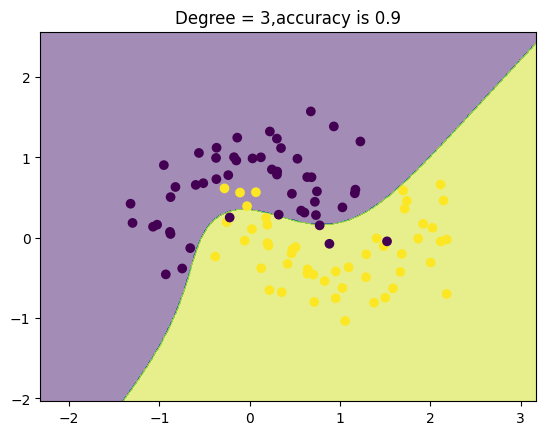

In [25]:
plot_decision_boundary(X,y,degree=3)


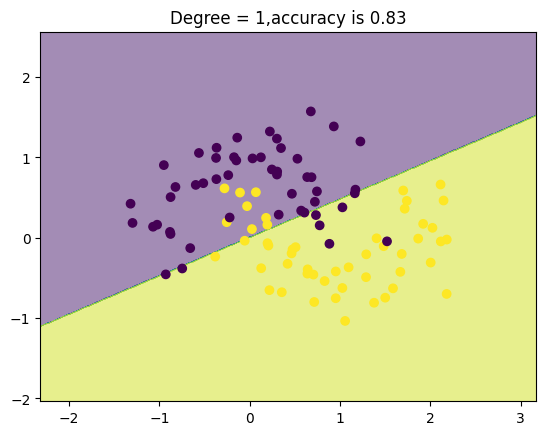

In [26]:
plot_decision_boundary(X,y)


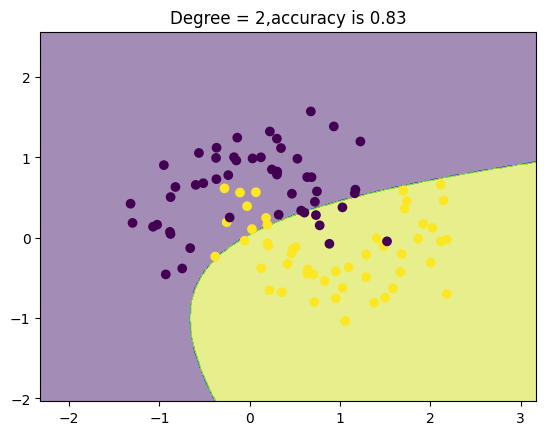

In [27]:
plot_decision_boundary(X,y,degree=2)
